## Preparing Data For LSTM Model

In [1117]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [1118]:

data_train = pd.read_csv('./data/BTC_day_train.csv')

data_train = data_train.drop(columns=[data_train.columns[0], 'Time'])

data_train.head()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
0,546032.0,13581.853333,79055.774840,13577.224578,-0.631845,-1.084205
1,1375295.0,11256.200000,312627.561330,11228.619219,-2325.653333,-3.104354
2,1483002.0,11082.995000,331822.898074,11109.805837,-173.205000,-2.371885
3,1057999.0,11119.696667,204609.312037,11132.567299,36.701667,-1.849318
4,716100.0,11520.748333,125430.954800,11519.809543,401.051667,-1.324697


In [1119]:
data_test = pd.read_csv('./data/BTC_day_test.csv')

data_test = data_test.drop(columns=[data_test.columns[0], 'Time'])

data_test.head()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
0,5245264.0,36853.776250,254899.781852,36785.026600,-2334.466607,0.283444
1,4035430.0,35884.194286,174589.020944,35920.637885,-969.581964,-0.191312
2,3698231.0,35924.745714,162424.239185,35892.636068,40.551429,-0.293085
3,3329228.0,36767.647143,143617.525589,36759.579332,842.901429,-0.052462
4,3697336.0,35678.465000,161577.522564,35807.521852,-1089.182143,-0.758468


In [1120]:
window_size = 7

In [1121]:
past_window = data_train.tail(window_size)

data_test = past_window.append(data_test, ignore_index=True)

In [1122]:
scaler = MinMaxScaler(feature_range=(0,1))
data_train = scaler.fit_transform(data_train)
data_test = scaler.fit_transform(data_test)

In [1123]:
X_train = []
Y_train = []

for i in range(window_size, data_train.shape[0]):
    X_train.append(data_train[i-window_size:i])
    Y_train.append(data_train[i, 0])


In [1124]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [1125]:
X_train.shape, Y_train.shape

((1039, 7, 6), (1039,))

In [1126]:
print(X_train)
print(Y_train)

[[[0.06237578 0.40358449 0.06640929 0.40366794 0.61162052 0.41911124]
  [0.19514287 0.31309523 0.28685708 0.31223779 0.14106245 0.34172724]
  [0.21238704 0.30635597 0.30497386 0.30761243 0.57669366 0.36978524]
  ...
  [0.0896041  0.32338859 0.11017873 0.32357369 0.69291672 0.40989894]
  [0.08217742 0.37189374 0.10105998 0.37230599 0.86405121 0.44210239]
  [0.10050868 0.3240839  0.11931713 0.32439562 0.36306227 0.41614852]]

 [[0.19514287 0.31309523 0.28685708 0.31223779 0.14106245 0.34172724]
  [0.21238704 0.30635597 0.30497386 0.30761243 0.57669366 0.36978524]
  [0.14434299 0.307784   0.18490819 0.30849853 0.6191764  0.38980275]
  ...
  [0.08217742 0.37189374 0.10105998 0.37230599 0.86405121 0.44210239]
  [0.10050868 0.3240839  0.11931713 0.32439562 0.36306227 0.41614852]
  [0.11105703 0.29579426 0.1455842  0.2956863  0.46459798 0.40030352]]

 [[0.21238704 0.30635597 0.30497386 0.30761243 0.57669366 0.36978524]
  [0.14434299 0.307784   0.18490819 0.30849853 0.6191764  0.38980275]
  [0

## Training LSTM Model

In [1127]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [1128]:
regressor = Sequential()

#R1
regressor.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.5))

#R2
regressor.add(LSTM(units=60, activation='relu', return_sequences=True))
regressor.add(Dropout(0.5))

#R3
regressor.add(LSTM(units=80, activation='relu', return_sequences=True))
regressor.add(Dropout(0.5))

#R4
regressor.add(LSTM(units=120, activation='relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

In [1129]:
regressor.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_128 (LSTM)             (None, 7, 50)             11400     
                                                                 
 dropout_128 (Dropout)       (None, 7, 50)             0         
                                                                 
 lstm_129 (LSTM)             (None, 7, 60)             26640     
                                                                 
 dropout_129 (Dropout)       (None, 7, 60)             0         
                                                                 
 lstm_130 (LSTM)             (None, 7, 80)             45120     
                                                                 
 dropout_130 (Dropout)       (None, 7, 80)             0         
                                                                 
 lstm_131 (LSTM)             (None, 120)             

In [1130]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [1131]:
regressor.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
33/33 [==============================] - 4s 12ms/step - loss: 0.0166
Epoch 2/10
33/33 [==============================] - 0s 12ms/step - loss: 0.0108
Epoch 3/10
33/33 [==============================] - 0s 11ms/step - loss: 0.0096
Epoch 4/10
33/33 [==============================] - 0s 12ms/step - loss: 0.0082
Epoch 5/10
33/33 [==============================] - 0s 11ms/step - loss: 0.0078
Epoch 6/10
33/33 [==============================] - 0s 12ms/step - loss: 0.0083
Epoch 7/10
33/33 [==============================] - 0s 11ms/step - loss: 0.0078
Epoch 8/10
33/33 [==============================] - 0s 11ms/step - loss: 0.0072
Epoch 9/10
33/33 [==============================] - 0s 11ms/step - loss: 0.0078
Epoch 10/10
33/33 [==============================] - 0s 12ms/step - loss: 0.0077


## Preparing Test Set For LSTM Prediction

In [1132]:
X_test = []
Y_test = []

for i in range(window_size, data_test.shape[0]):
    X_test.append(data_test[i-window_size:i])
    Y_test.append(data_test[i, 0])

In [1133]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [1134]:
X_test.shape, Y_test.shape

((221, 7, 6), (221,))

## Predicting Outputs For Test Set

In [1135]:
Y_pred = regressor.predict(X_test)

In [1136]:
Y_test

array([0.26028743, 0.17764511, 0.15461145, 0.12940529, 0.15455031,
       0.20164309, 0.32159096, 0.27983836, 0.12312047, 0.09553376,
       0.1750047 , 0.17100857, 0.20766915, 0.17663325, 0.49100622,
       0.19177964, 0.38195887, 0.13275208, 0.13914955, 0.19852219,
       0.14323619, 0.19967627, 0.16405466, 0.32027055, 0.29459334,
       0.27479014, 0.23765009, 0.1961083 , 0.1595857 , 0.1591906 ,
       0.2153403 , 0.20191093, 0.20944443, 0.12539973, 0.19404735,
       0.23126308, 0.15025635, 0.4073595 , 0.54386938, 0.25384584,
       0.22060834, 0.28014042, 0.15435153, 0.4967749 , 0.1547704 ,
       0.18272776, 0.1985306 , 0.16616213, 0.09188197, 0.12310975,
       0.15658755, 0.1799782 , 0.22749121, 0.21815298, 0.2195083 ,
       0.24035813, 0.14393   , 0.29219303, 0.24012301, 0.20464341,
       0.17564721, 0.15376913, 0.12778453, 0.13901306, 0.18679234,
       0.17052761, 0.25824813, 0.23532554, 0.1621608 , 0.11077257,
       0.09998572, 0.16176516, 0.12422038, 0.40365531, 0.12022

In [1137]:
Y_pred

array([[0.0930781 ],
       [0.10941366],
       [0.1255403 ],
       [0.13633838],
       [0.12976621],
       [0.14711763],
       [0.16390118],
       [0.17685081],
       [0.16557151],
       [0.16731176],
       [0.17224707],
       [0.1760831 ],
       [0.17646544],
       [0.16697057],
       [0.1424692 ],
       [0.12786907],
       [0.14226866],
       [0.16828723],
       [0.1852637 ],
       [0.2018557 ],
       [0.21840644],
       [0.23354617],
       [0.19455011],
       [0.20128366],
       [0.1843608 ],
       [0.20270279],
       [0.21843717],
       [0.23435163],
       [0.2572527 ],
       [0.27474695],
       [0.29744253],
       [0.28463665],
       [0.27451634],
       [0.27114838],
       [0.26703414],
       [0.2694736 ],
       [0.27893192],
       [0.28997156],
       [0.30032846],
       [0.31672087],
       [0.3299428 ],
       [0.35127333],
       [0.3548821 ],
       [0.3467377 ],
       [0.3399023 ],
       [0.30942178],
       [0.27350855],
       [0.269

## Descaling Outputs

In [1138]:
scale_factor = 1/scaler.scale_[4]


In [1139]:
scale_factor

15254.227857142863

In [1140]:
Y_pred = Y_pred * scale_factor
Y_test = Y_test * scale_factor

In [1141]:
Y_pred.shape, Y_test.shape

((221, 1), (221,))

In [1142]:
Y_test

array([ 3970.48369989,  2709.83898463,  2358.47827122,  1973.97785061,
        2357.54568293,  3075.90958505,  4905.62175832,  4268.71814076,
        1878.10777449,  1457.2937205 ,  2669.56159052,  2608.60366035,
        3167.83257241,  2694.40386694,  7489.92081326,  2925.45027107,
        5826.48756894,  2025.03054695,  2122.61887792,  3028.30277638,
        2184.95745556,  3045.90733409,  2502.52721295,  4885.47993527,
        4493.79389585,  4191.71135604,  3625.1686594 ,  2991.48064794,
        2434.35657202,  2428.32965507,  3284.84999973,  3079.99525955,
        3194.91306073,  1912.87612471,  2960.04252361,  3527.73975414,
        2292.0446411 ,  6213.9545581 ,  8296.30750389,  3872.22223816,
        3365.20993431,  4273.32585631,  2354.51346849,  7577.91755183,
        2360.90300077,  2787.37093639,  3028.43094215,  2534.67493798,
        1401.5885027 ,  1877.94418079,  2388.62223392,  2745.42842934,
        3470.20270369,  3327.75531302,  3348.42959709,  3666.47763161,
      

In [1143]:
Y_pred

array([[1419.8345 ],
       [1669.0209 ],
       [1915.0203 ],
       [2079.7368 ],
       [1979.4833 ],
       [2244.1658 ],
       [2500.1858 ],
       [2697.7224 ],
       [2525.6655 ],
       [2552.2117 ],
       [2627.4958 ],
       [2686.0117 ],
       [2691.844  ],
       [2547.007  ],
       [2173.2576 ],
       [1950.5438 ],
       [2170.1985 ],
       [2567.0918 ],
       [2826.0544 ],
       [3079.1528 ],
       [3331.6216 ],
       [3562.5664 ],
       [2967.7117 ],
       [3070.4268 ],
       [2812.2817 ],
       [3092.0745 ],
       [3332.0903 ],
       [3574.8533 ],
       [3924.1912 ],
       [4191.0527 ],
       [4537.256  ],
       [4341.912  ],
       [4187.5347 ],
       [4136.159  ],
       [4073.3997 ],
       [4110.612  ],
       [4254.891  ],
       [4423.292  ],
       [4581.279  ],
       [4831.332  ],
       [5033.0225 ],
       [5358.4033 ],
       [5413.452  ],
       [5289.216  ],
       [5184.9473 ],
       [4719.99   ],
       [4172.1616 ],
       [4104.

In [1144]:
og_data_test = pd.read_csv('./data/BTC_day_test.csv')

og_data_test = og_data_test.drop(columns=[og_data_test.columns[0], 'Time'])

close_price = og_data_test['Close'] 



In [1145]:
pred_list = []
price_list = []

count = 0
for each in close_price:

    prediction = each + Y_pred [count]
    price = each + Y_test [count]
    
    pred_list.append(prediction)
    price_list.append(price)
    
    count = count + 1
    

In [1146]:
pred_list

[array([38273.613], dtype=float32),
 array([37553.215], dtype=float32),
 array([37839.766], dtype=float32),
 array([38847.387], dtype=float32),
 array([37657.95], dtype=float32),
 array([37799.348], dtype=float32),
 array([33151.285], dtype=float32),
 array([35579.37], dtype=float32),
 array([34526.195], dtype=float32),
 array([34794.387], dtype=float32),
 array([34624.633], dtype=float32),
 array([35246.586], dtype=float32),
 array([33208.62], dtype=float32),
 array([35959.87], dtype=float32),
 array([36504.99], dtype=float32),
 array([36162.836], dtype=float32),
 array([35629.25], dtype=float32),
 array([38076.117], dtype=float32),
 array([40551.832], dtype=float32),
 array([40131.08], dtype=float32),
 array([41687.66], dtype=float32),
 array([42502.98], dtype=float32),
 array([41826.41], dtype=float32),
 array([49700.734], dtype=float32),
 array([49365.668], dtype=float32),
 array([47971.062], dtype=float32),
 array([51434.66], dtype=float32),
 array([51040.594], dtype=float32),
 ar

In [1147]:
price_list

[40824.25994989358,
 38594.033270341264,
 38283.223985506396,
 38741.62499346846,
 38036.01068293158,
 38631.09244218989,
 35556.71925832297,
 37150.36671219198,
 33878.63777449111,
 33699.46747050142,
 34666.70034051843,
 35169.17866034966,
 33684.60828669414,
 36107.26886694369,
 41821.65081326098,
 37137.74455678856,
 39285.53756893572,
 37534.05340409473,
 39848.39602077698,
 40080.22849067049,
 40540.9960269843,
 41986.32108408808,
 41361.22721295369,
 51515.78743527443,
 51047.18246727609,
 49070.699927465845,
 51727.73723082468,
 50457.222076508755,
 49653.96657201709,
 51086.54251221672,
 51178.82571401818,
 52347.623830980185,
 55423.793060727556,
 53536.49755327776,
 58962.00680932687,
 59439.57403984996,
 59786.741783954574,
 60323.975986674166,
 57266.99036103586,
 53652.47509530338,
 50319.66564859275,
 50606.42821173882,
 48308.35061135152,
 57200.963266111045,
 50717.71050077237,
 52980.18054827536,
 51358.54931887822,
 51448.12208083377,
 50390.06850269621,
 52761.85418

## Visualization & Evaluation

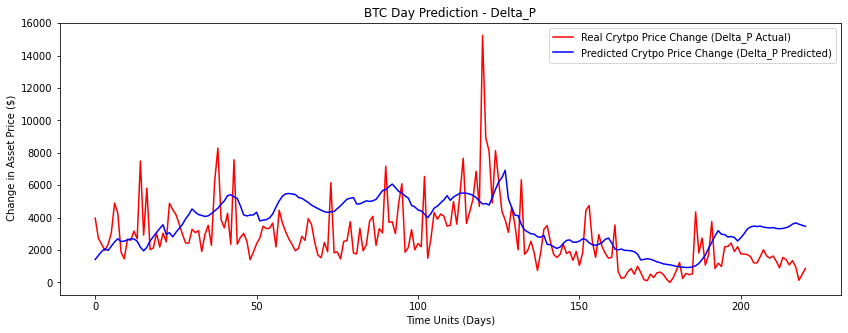

In [1148]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Crytpo Price Change (Delta_P Actual)')
plt.plot(Y_pred, color = 'blue', label = 'Predicted Crytpo Price Change (Delta_P Predicted)')
plt.title('BTC Day Prediction - Delta_P')
plt.xlabel('Time Units (Days)')
plt.ylabel(' Change in Asset Price ($)')
plt.legend()
plt.show()

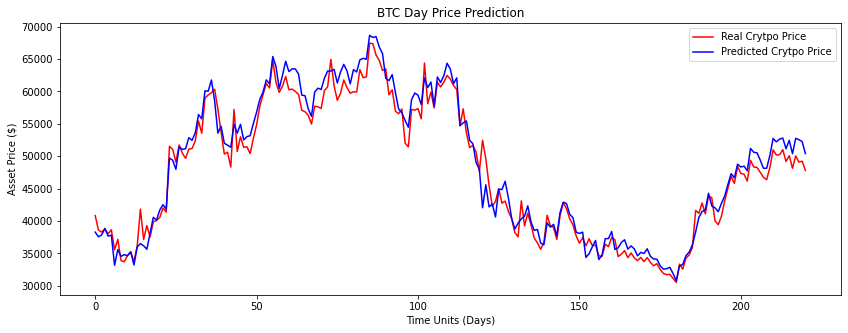

In [1149]:
plt.figure(figsize=(14,5))
plt.plot(price_list, color = 'red', label = 'Real Crytpo Price')
plt.plot(pred_list, color = 'blue', label = 'Predicted Crytpo Price')
plt.title('BTC Day Price Prediction')
plt.xlabel('Time Units (Days)')
plt.ylabel('Asset Price ($)')
plt.legend()
plt.show()

In [1150]:
diff_sq_sum = 0
for i in range(0, len(price_list)):
    diff = price_list[i] - pred_list[i]
    diff_sq = diff * diff
    diff_sq_sum = diff_sq_sum + diff_sq
    
RMSE = math.sqrt(diff_sq_sum/len(price_list))
    
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 1925.467540624874


In [1151]:
dir_match_count = 0
price_diff = 0
pred_diff = 0
for i in range(1, len(price_list)):
    
    price_diff = price_list [i] - price_list[i - 1]
    pred_diff = pred_list[i] - pred_list[i - 1]
    
    if np.sign(price_diff) == np.sign(pred_diff):
        dir_match_count = dir_match_count + 1

correct_dir_perc = dir_match_count/(len(price_list) - 1) * 100
        
print("Correct Direction Prediction Accuracy: {:.3f} %".format(correct_dir_perc))

Correct Direction Prediction Accuracy: 79.091 %
